# Predicting Company Bankruptcy using Machine Learning

## Table of Contents
* [Chapter 1: Project Overview](#chapter1)
    * [1.1 Project Motivation](#section1_1)
    * [1.2 Dataset Description](#section1_2)
    * [1.3 Methodologies](#section1_3)
* [Chapter 2: Data Preparation](#chapter2)
    * [2.1 Data Collection](#section2_1)
    * [2.2 Data Exploration (EDA)](#section2_2)
    * [2.3 Data Pre-Processing](#section2_3)
* [Chapter 3: Modelling](#chapter3)
    * [3.1 Evaluation Metrics](#section3_1)
    * [3.2 Machine Learning Models](#section3_2)
    * [3.3 Modelling Evaluations](#section3_3)
* [Chapter 4: Results](#chapter4)

## 1) Problem Statement <a id="section1_1"></a>
This project aims to develop a robust predictive model for company bankruptcy using various financial indicators, which allow stakeholders to make informed decisions in times of crisis.

## 2) Data Source <a class="anchor" id="section1_2"></a>
The dataset contains information about financial indicators leading to bankruptcy prediction of Polish companies.

- Dataset Source: [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data)
- Contains 495 (rows of) bankrupted companies and 10008 (rows of) operational companies at the end of the 3-year forecasting period.

### 2.1 Import required packages

In [1]:
import requests
import zipfile
import os
from scipy.io import arff

import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

### 2.2 Data Extraction from zip file <a class="anchor" id="section2_1"></a>

In [2]:
source_url = (
    "https://archive.ics.uci.edu/static/public/365/polish+companies+bankruptcy+data.zip"
)
data_folder_path = "data"
dest_url = "data/downloaded_file.zip"

In [3]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


class GetZipFile(BaseEstimator, TransformerMixin):

    def fit(self, X):
        return self

    def transform(self, X):
        response = requests.get(source_url)
        with open(dest_url, "wb") as zipfile:
            zipfile.write(response.content)
        return X


class SaveFile(BaseEstimator, TransformerMixin):

    def fit(self, X):
        return self

    @staticmethod
    def extract_arff_from_zip(zip_path, arff_filename, extraction_path="."):
        with zipfile.ZipFile(zip_path, "r") as zip_ref:
            zip_ref.extract(arff_filename, path=data_folder_path)
            return os.path.join(data_folder_path, arff_filename)

    @staticmethod
    def convert_arff_to_csv(arff_path, csv_path):
        data, _ = arff.loadarff(arff_path)
        df = pd.DataFrame(data)
        for col in df.select_dtypes([object]):
            if isinstance(df[col][0], bytes):
                df[col] = df[col].apply(lambda x: x.decode("utf-8"))
        df.to_csv(csv_path, index=False)

    def transform(self, X):
        for i in range(1, 6):
            arff_filename = f"{i}year.arff"
            csv_path0 = f"{i}year.csv"
            extracted_arff_path = self.extract_arff_from_zip(dest_url, arff_filename)

            csv_path = os.path.join(data_folder_path, csv_path0)
            self.convert_arff_to_csv(extracted_arff_path, csv_path)
        return self

In [4]:
DataExtractionPipeline = Pipeline(
    [("get_zip_file", GetZipFile()), ("save_file", SaveFile())]
)

# DataExtractionPipeline.fit_transform((source_url, dest_url))

### Import the CSV data as Pandas dataframe
We chose to use only the 3rd year's dataset - because it has the least number of NULL values.

In [5]:
df = pd.read_csv("data/3year.csv")
df_origin = df.copy()

Rename column headings

In [6]:
columns = [
    "net profit / total assets",
    "total liabilities / total assets",
    "working capital / total assets",
    "current assets / short-term liabilities",
    "[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365",
    "retained earnings / total assets",
    "EBIT / total assets",
    "book value of equity / total liabilities",
    "sales / total assets",
    "equity / total assets",
    "(gross profit + extraordinary items + financial expenses) / total assets",
    "gross profit / short-term liabilities",
    "(gross profit + depreciation) / sales",
    "(gross profit + interest) / total assets",
    "(total liabilities * 365) / (gross profit + depreciation)",
    "(gross profit + depreciation) / total liabilities",
    "total assets / total liabilities",
    "gross profit / total assets",
    "gross profit / sales",
    "(inventory * 365) / sales",
    "sales (n) / sales (n-1)",
    "profit on operating activities / total assets",
    "net profit / sales",
    "gross profit (in 3 years) / total assets",
    "(equity - share capital) / total assets",
    "(net profit + depreciation) / total liabilities",
    "profit on operating activities / financial expenses",
    "working capital / fixed assets",
    "logarithm of total assets",
    "(total liabilities - cash) / sales",
    "(gross profit + interest) / sales",
    "(current liabilities * 365) / cost of products sold",
    "operating expenses / short-term liabilities",
    "operating expenses / total liabilities",
    "profit on sales / total assets",
    "total sales / total assets",
    "(current assets - inventories) / long-term liabilities",
    "constant capital / total assets",
    "profit on sales / sales",
    "(current assets - inventory - receivables) / short-term liabilities",
    "total liabilities / ((profit on operating activities + depreciation) * (12/365))",
    "profit on operating activities / sales",
    "rotation receivables + inventory turnover in days",
    "(receivables * 365) / sales",
    "net profit / inventory",
    "(current assets - inventory) / short-term liabilities",
    "(inventory * 365) / cost of products sold",
    "EBITDA (profit on operating activities - depreciation) / total assets",
    "EBITDA (profit on operating activities - depreciation) / sales",
    "current assets / total liabilities",
    "short-term liabilities / total assets",
    "(short-term liabilities * 365) / (cost of products sold)",
    "equity / fixed assets",
    "constant capital / fixed assets",
    "working capital",
    "(sales - cost of products sold) / sales",
    "(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)",
    "total costs /total sales",
    "long-term liabilities / equity",
    "sales / inventory",
    "sales / receivables",
    "(short-term liabilities *365) / sales",
    "sales / short-term liabilities",
    "sales / fixed assets",
    "class",
]

df.columns = columns

Show Top 5 records

In [7]:
df.head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,0
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,0
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,0
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,0


### Turn target column to discrete
Turn target column to discrete, for ease of data checks and data visualisation.

In [8]:
class AsDiscrete(BaseEstimator, TransformerMixin):

    def fit(self, df):
        return self

    def transform(self, df):
        ncol = len(df.columns) - 1
        feature_space = df.iloc[:, 0:ncol]
        target_column = df.iloc[:, ncol]

        n = len(target_column)
        new_col = [0] * n
        for i in range(n):
            if target_column[i] == "b'0'":
                new_col[i] = 0
            else:
                new_col[i] = 1

        pd_col = pd.DataFrame(new_col, columns=["Target"])
        new_df = pd.concat([feature_space, pd_col], axis=1)

        new_df["Target"] = new_df["Target"].astype("category")

        return new_df

In [9]:
AsDiscretePipeline = Pipeline(
    [
        ("toDiscrete", AsDiscrete()),
    ]
)

# df = AsDiscretePipeline.fit_transform(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                               --------------  -----  
 0   net profit / total assets                                                                                            10503 non-null  float64
 1   total liabilities / total assets                                                                                     10503 non-null  float64
 2   working capital / total assets                                                                                       10503 non-null  float64
 3   current assets / short-term liabilities                                                                              10485 non-null  float64
 4   [(cash + s

Shape of the dataset

In [10]:
# Overview of the dataset
df.shape

(10503, 65)

### 2.3 Dataset information:
-  There are 10503 rows and 65 columns  (64 explanatory variable and one target variable)
-  Target column: 
    -  bankrupt -> 1
    -  not-bankrupt -> 0 

There are 64 variables, and 1 target variable:  
- X1 net profit / total assets  
- X2 total liabilities / total assets  
- X3 working capital / total assets  
- X4 current assets / short-term liabilities  
- X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365  
- X6 retained earnings / total assets  
- X7 EBIT / total assets  
- X8 book value of equity / total liabilities  
- X9 sales / total assets  
- X10 equity / total assets  
- X11 (gross profit + extraordinary items + financial expenses) / total assets  
- X12 gross profit / short-term liabilities  
- X13 (gross profit + depreciation) / sales  
- X14 (gross profit + interest) / total assets   
- X15 (total liabilities * 365) / (gross profit + depreciation)   
- X16 (gross profit + depreciation) / total liabilities   
- X17 total assets / total liabilities   
- X18 gross profit / total assets   
- X19 gross profit / sales   
- X20 (inventory * 365) / sales   
- X21 sales (n) / sales (n-1)  
- X22 profit on operating activities / total assets  
- X23 net profit / sales  
- X24 gross profit (in 3 years) / total assets  
- X25 (equity - share capital) / total assets  
- X26 (net profit + depreciation) / total liabilities  
- X27 profit on operating activities / financial expenses  
- X28 working capital / fixed assets  
- X29 logarithm of total assets  
- X30 (total liabilities - cash) / sales  
- X31 (gross profit + interest) / sales  
- X32 (current liabilities * 365) / cost of products sold  
- X33 operating expenses / short-term liabilities  
- X34 operating expenses / total liabilities  
- X35 profit on sales / total assets  
- X36 total sales / total assets  
- X37 (current assets - inventories) / long-term liabilities  
- X38 constant capital / total assets  
- X39 profit on sales / sales  
- X40 (current assets - inventory - receivables) / short-term liabilities  
- X41 total liabilities / ((profit on operating activities + depreciation) * (12/365))  
- X42 profit on operating activities / sales  
- X43 rotation receivables + inventory turnover in days  
- X44 (receivables * 365) / sales  
- X45 net profit / inventory  
- X46 (current assets - inventory) / short-term liabilities   
- X47 (inventory * 365) / cost of products sold  
- X48 EBITDA (profit on operating activities - depreciation) / total assets  
- X49 EBITDA (profit on operating activities - depreciation) / sales  
- X50 current assets / total liabilities  
- X51 short-term liabilities / total assets  
- X52 (short-term liabilities * 365) / (cost of products sold)  
- X53 equity / fixed assets  
- X54 constant capital / fixed assets  
- X55 working capital  
- X56 (sales - cost of products sold) / sales  
- X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)  
- X58 total costs / total sales  
- X59 long-term liabilities / equity  
- X60 sales / inventory  
- X61 sales / receivables  
- X62 (short-term liabilities *365) / sales  
- X63 sales / short-term liabilities  
- X64 sales / fixed assets  
- class (target column)  

## 3) Data Checks to perform  
- Check missing values
- Check duplicates
- Check data type
- Check the number of unique values for each column
- Check statistics of dataset
- Check various categories present in the different categorical column 

#### 3.1 Check missing values

Number of missing values in each attribute

In [11]:
pd.set_option("display.max_rows", None)
df.isna().sum()

net profit / total assets                                                                                                 0
total liabilities / total assets                                                                                          0
working capital / total assets                                                                                            0
current assets / short-term liabilities                                                                                  18
[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365      25
retained earnings / total assets                                                                                          0
EBIT / total assets                                                                                                       0
book value of equity / total liabilities                                                                                 14
sales / 

Number of rows with at least one missing value

In [12]:
sum(df.apply(lambda row: sum(row.isna().values), axis=1) > 0)

5618

Number of columns with at least one missing value

In [13]:
sum(df.apply(lambda row: sum(row.isna().values), axis=0) > 0)

44

#### 3.2 Check duplicates

In [14]:
df.duplicated().sum()

87

There are 87 duplicate rows.

#### 3.3 Check data types

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                               --------------  -----  
 0   net profit / total assets                                                                                            10503 non-null  float64
 1   total liabilities / total assets                                                                                     10503 non-null  float64
 2   working capital / total assets                                                                                       10503 non-null  float64
 3   current assets / short-term liabilities                                                                              10485 non-null  float64
 4   [(cash + s

#### 3.4 Check number of unique values of each column

In [16]:
df.nunique()

net profit / total assets                                                                                               9948
total liabilities / total assets                                                                                        9806
working capital / total assets                                                                                          9947
current assets / short-term liabilities                                                                                 9425
[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365    10186
retained earnings / total assets                                                                                        5864
EBIT / total assets                                                                                                     9987
book value of equity / total liabilities                                                                                9939


#### 3.5 Check statistics of dataset

In [17]:
df.describe()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
count,10503.000000,10503.000000,10503.000000,10485.000000,1.047800e+04,10503.000000,10503.000000,10489.000000,10500.000000,10503.000000,...,10460.000000,10503.000000,10474.000000,10503.000000,9.911000e+03,10486.000000,1.046000e+04,10485.000000,10275.000000,10503.000000
mean,0.052844,0.619911,0.095490,9.980499,-1.347662e+03,-0.121159,0.065624,19.140113,1.819254,0.366093,...,-0.530082,-0.014817,3.848794,1.429319,5.713363e+02,13.935361,1.355370e+02,9.095149,35.766800,0.047129
std,0.647797,6.427041,6.420056,523.691951,1.185806e+05,6.970625,0.651152,717.756745,7.581659,6.428603,...,55.978608,18.684047,190.201224,77.273270,3.715967e+04,83.704103,2.599116e+04,31.419096,428.298315,0.211926
min,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,-479.730000,...,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.590300,-2.336500e+06,-0.000156,-0.000102,0.000000
25%,0.000686,0.253955,0.017461,1.040100,-5.207075e+01,0.000000,0.002118,0.431270,1.011275,0.297340,...,0.005137,0.006796,0.875560,0.000000,5.533150e+00,4.486075,4.073700e+01,3.062800,2.023350,0.000000
50%,0.043034,0.464140,0.198560,1.605600,1.579300e+00,0.000000,0.050945,1.111000,1.199000,0.515500,...,0.051765,0.106880,0.953060,0.002976,9.952100e+00,6.677300,7.066400e+01,5.139200,4.059300,0.000000
75%,0.123805,0.689330,0.419545,2.959500,5.608400e+01,0.072584,0.142275,2.857100,2.059100,0.725635,...,0.130010,0.271310,0.995927,0.240320,2.093600e+01,10.587500,1.182200e+02,8.882600,9.682750,0.000000
max,52.652000,480.730000,17.708000,53433.000000,6.854400e+05,45.533000,52.652000,53432.000000,740.440000,11.837000,...,293.150000,552.640000,18118.000000,7617.300000,3.660200e+06,4470.400000,1.073500e+06,1974.500000,21499.000000,1.000000


#### 3.6 Categories in target column

In [18]:
print("Categories in 'class' variable:    ", end=" ")
print(df["class"].unique())

Categories in 'class' variable:     [0 1]


Insights
- All 64 explanatory variables are numerical.
- 4% of the companies are bankrupt after 3 years.
- The means are in the range of -1.4 and 35, with most means around 0.
- Most standard deviations are close, which are less than 7. However, some variables have very large standard deviations of more than 500. 
- The maximum values for ranges from 3.38*10^5 all the way to 53433.
- There are 3 variables that have at least 100 missing values.
- There are 87 duplicated rows. 


## 3.7 Data Exploration (EDA) with Visualization <a id="section2_2_1"></a> 

Import required libraries

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

from chart_studio import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

import cufflinks

cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# make a copy of the datasets for visualization
df_graph = df.copy()

In [20]:
labels = df["class"].unique().tolist()
values = df["class"].tolist()

#### Pie Chart
Pie Chart showing the portion of Polish companies that are bankrupt and not bankrupt.

In [21]:
class_counts = df.groupby("class")["class"].count()
class_counts_df = class_counts.reset_index(name="counts")

label_mapping = {0: "Non-Bankrupt", 1: "Bankrupt"}
class_counts_df["class"] = class_counts_df["class"].map(label_mapping)

custom_colors = ["#636efa", "#eb543c"]

class_counts_df

,class,counts
0,Non-Bankrupt,10008
1,Bankrupt,495


In [22]:
# using iplot from cufflinks

class_counts_df.iplot(
    kind="pie",
    labels="class",
    values="counts",
    title="Percentage of Polish Bankrupt and Not Bankrupt Companies",
    colors=custom_colors,
    textinfo="label+percent",
)

In [23]:
# using go from plotly

fig = go.Figure(
    data=[
        go.Pie(
            labels=class_counts_df["class"],
            values=class_counts_df["counts"],
            marker=dict(colors=custom_colors),
            textinfo="label+percent",
            hoverinfo="label+percent+value",
            hole=0.4,  # for donut
        )
    ]
)

fig.update_layout(
    title_text="Percentage of Polish Bankrupt and Not Bankrupt Companies",
    showlegend=True,
)

fig.show()

#### Tree Map
Tree map to show proportion of bankrupt companies in our dataset.

In [24]:
fig = px.treemap(
    class_counts_df,
    path=["class"],
    values="counts",
    color="class",
    color_discrete_sequence=custom_colors,
    hover_name=class_counts_df["class"],
)

fig.update_layout(
    title="Percentage of Polish Bankrupt and Non-Bankrupt Companies",
    title_x=0.5,
    font=dict(family="Arial", size=15, color="black"),
    margin=dict(t=50, l=10, r=10, b=10),
    plot_bgcolor="rgba(0,0,0,0)",
)

fig.update_traces(
    hovertemplate="<br>%{label}<br>count : %{value}<br>percent : %{percentRoot:.2%}"
)

fig.show()

The pie chart, donut chart, and tree map shows the class imbalance in our dataset.

#### Missingness Map
We first plot a missingness map to see the sparsity of our dataset.

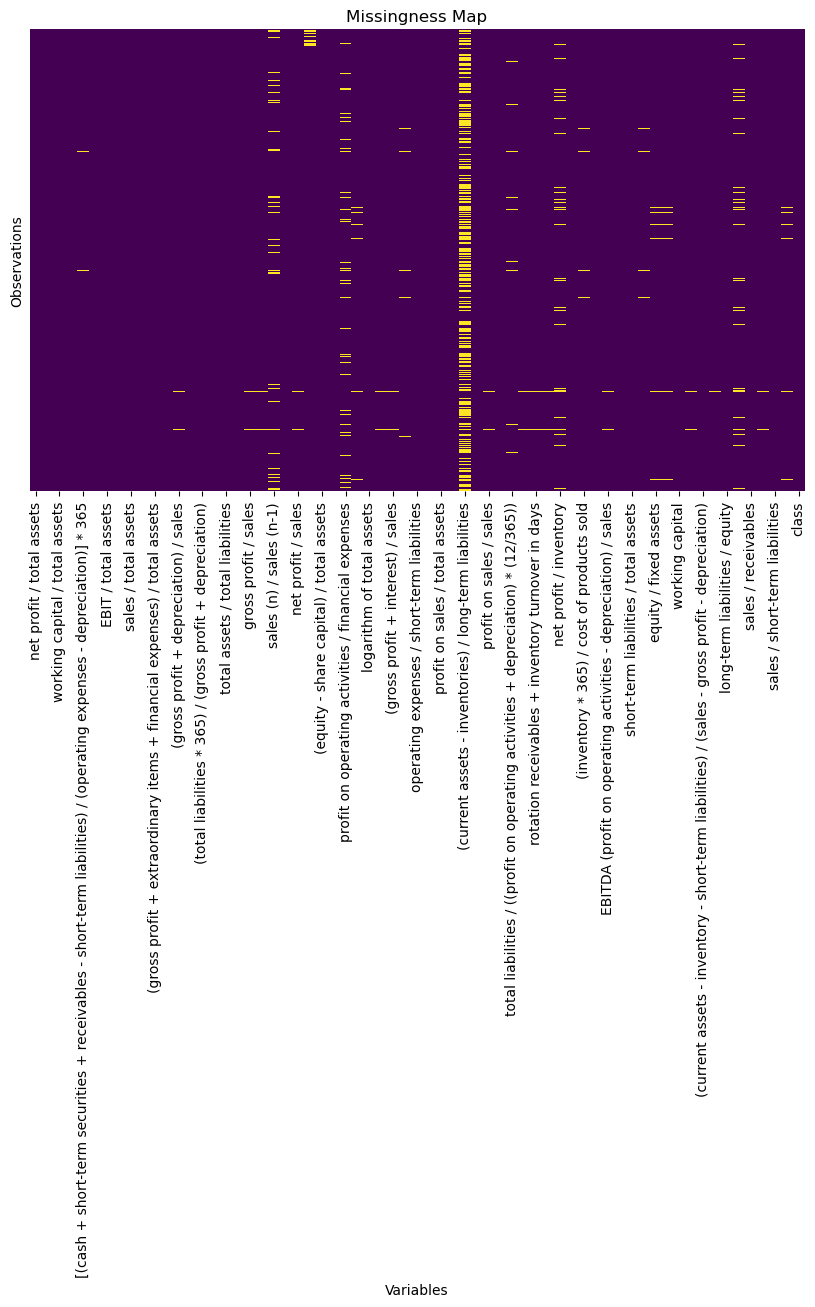

In [25]:
# Create a missingness matrix
missing_values = df_graph.isnull()

# Plot the missingness map
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cmap="viridis", cbar=False)
plt.title("Missingness Map")
plt.xlabel("Variables")
plt.ylabel("Observations")
plt.yticks([])
plt.show()

We can see that:
-  `X37 (current assets - inventories) / long-term liabilities` are almost filled with missing values with variation in occurrence. 
-  There are 6 variables with moderate number of missing values.  
-  There are 37 variables with sparsely located missing values.  
-  In total, there are 44 variables that have at least one missing values, as verified in the data checks section.  

#### Histogram

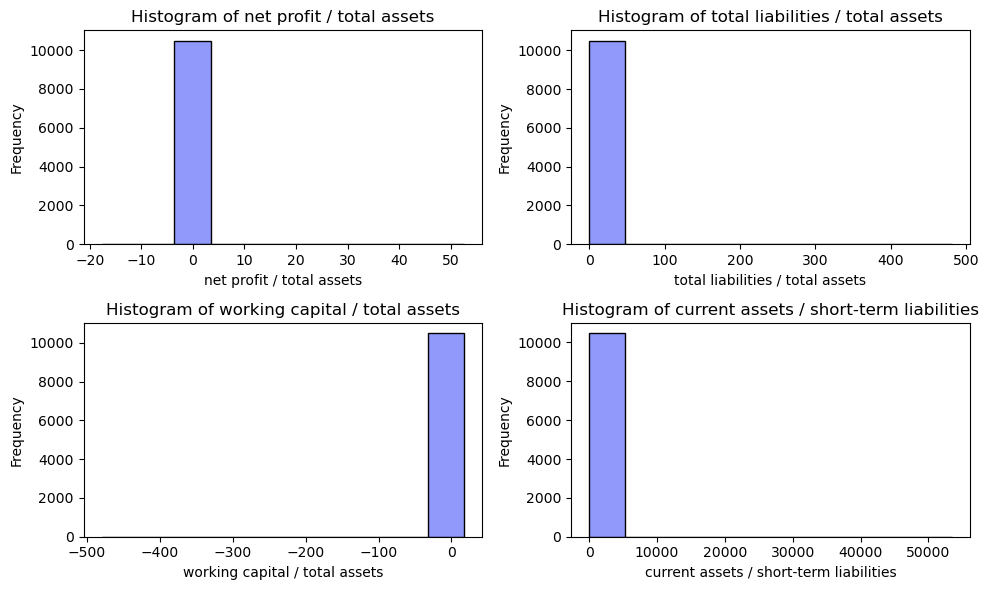

In [26]:
# Here we illustrate the histogram distribution for the first 4 features
df_graph = df.copy()
features = df_graph.columns[:4]
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(df_graph[feature], bins=10, ax=axes[i], color="#636efa", alpha=0.7)
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Histogram of {feature}")
    axes[i].grid(False)

plt.tight_layout()
plt.show()

We see that there is one or two bars in each histogram. This means that most data are concentrated within a small range, and that there are outliers. 
View individual histogram below to see the distribution more clearly. 

Change the index (0-64) at `explanatory_variable_index`.

In [27]:
explanatory_variable_index = 45

df.iloc[:, explanatory_variable_index].iplot(
    kind="hist",
    bins=30,
    title=f"Histogram for {df.columns[explanatory_variable_index]}",
    yTitle="Frequency",
    xTitle=df.columns[explanatory_variable_index],
    linecolor="black",
)

#### Density Plot

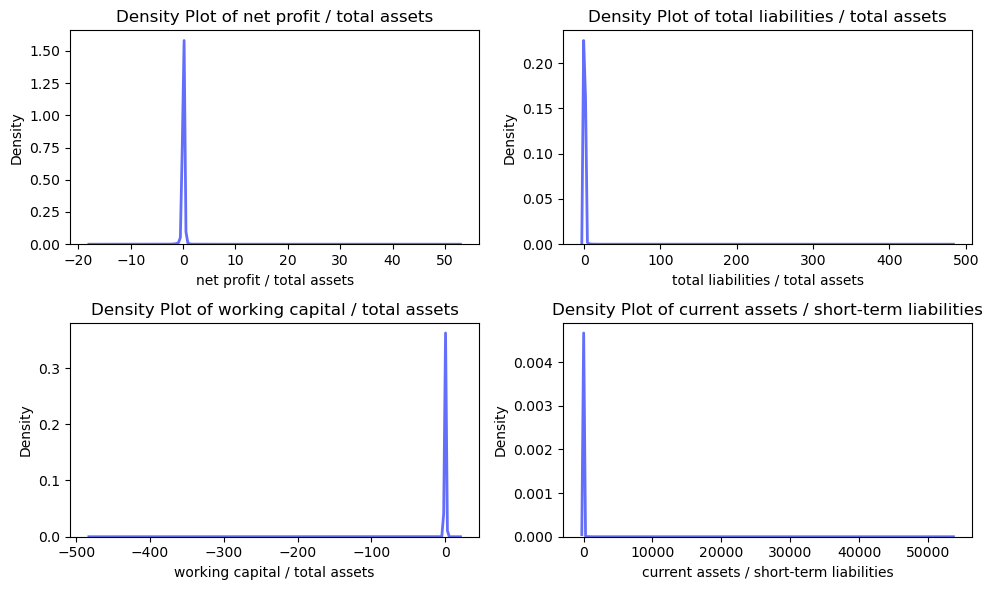

In [28]:
features = df_graph.columns[:4]
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.kdeplot(df_graph[feature], ax=axes[i], color="#636efa", linewidth=2)
    axes[i].set_ylabel("Density")
    axes[i].set_title(f"Density Plot of {feature}")
    axes[i].grid(False)

plt.tight_layout()
plt.show()

### Boxplot
To see data distribution and outliers for all explanatory variables.

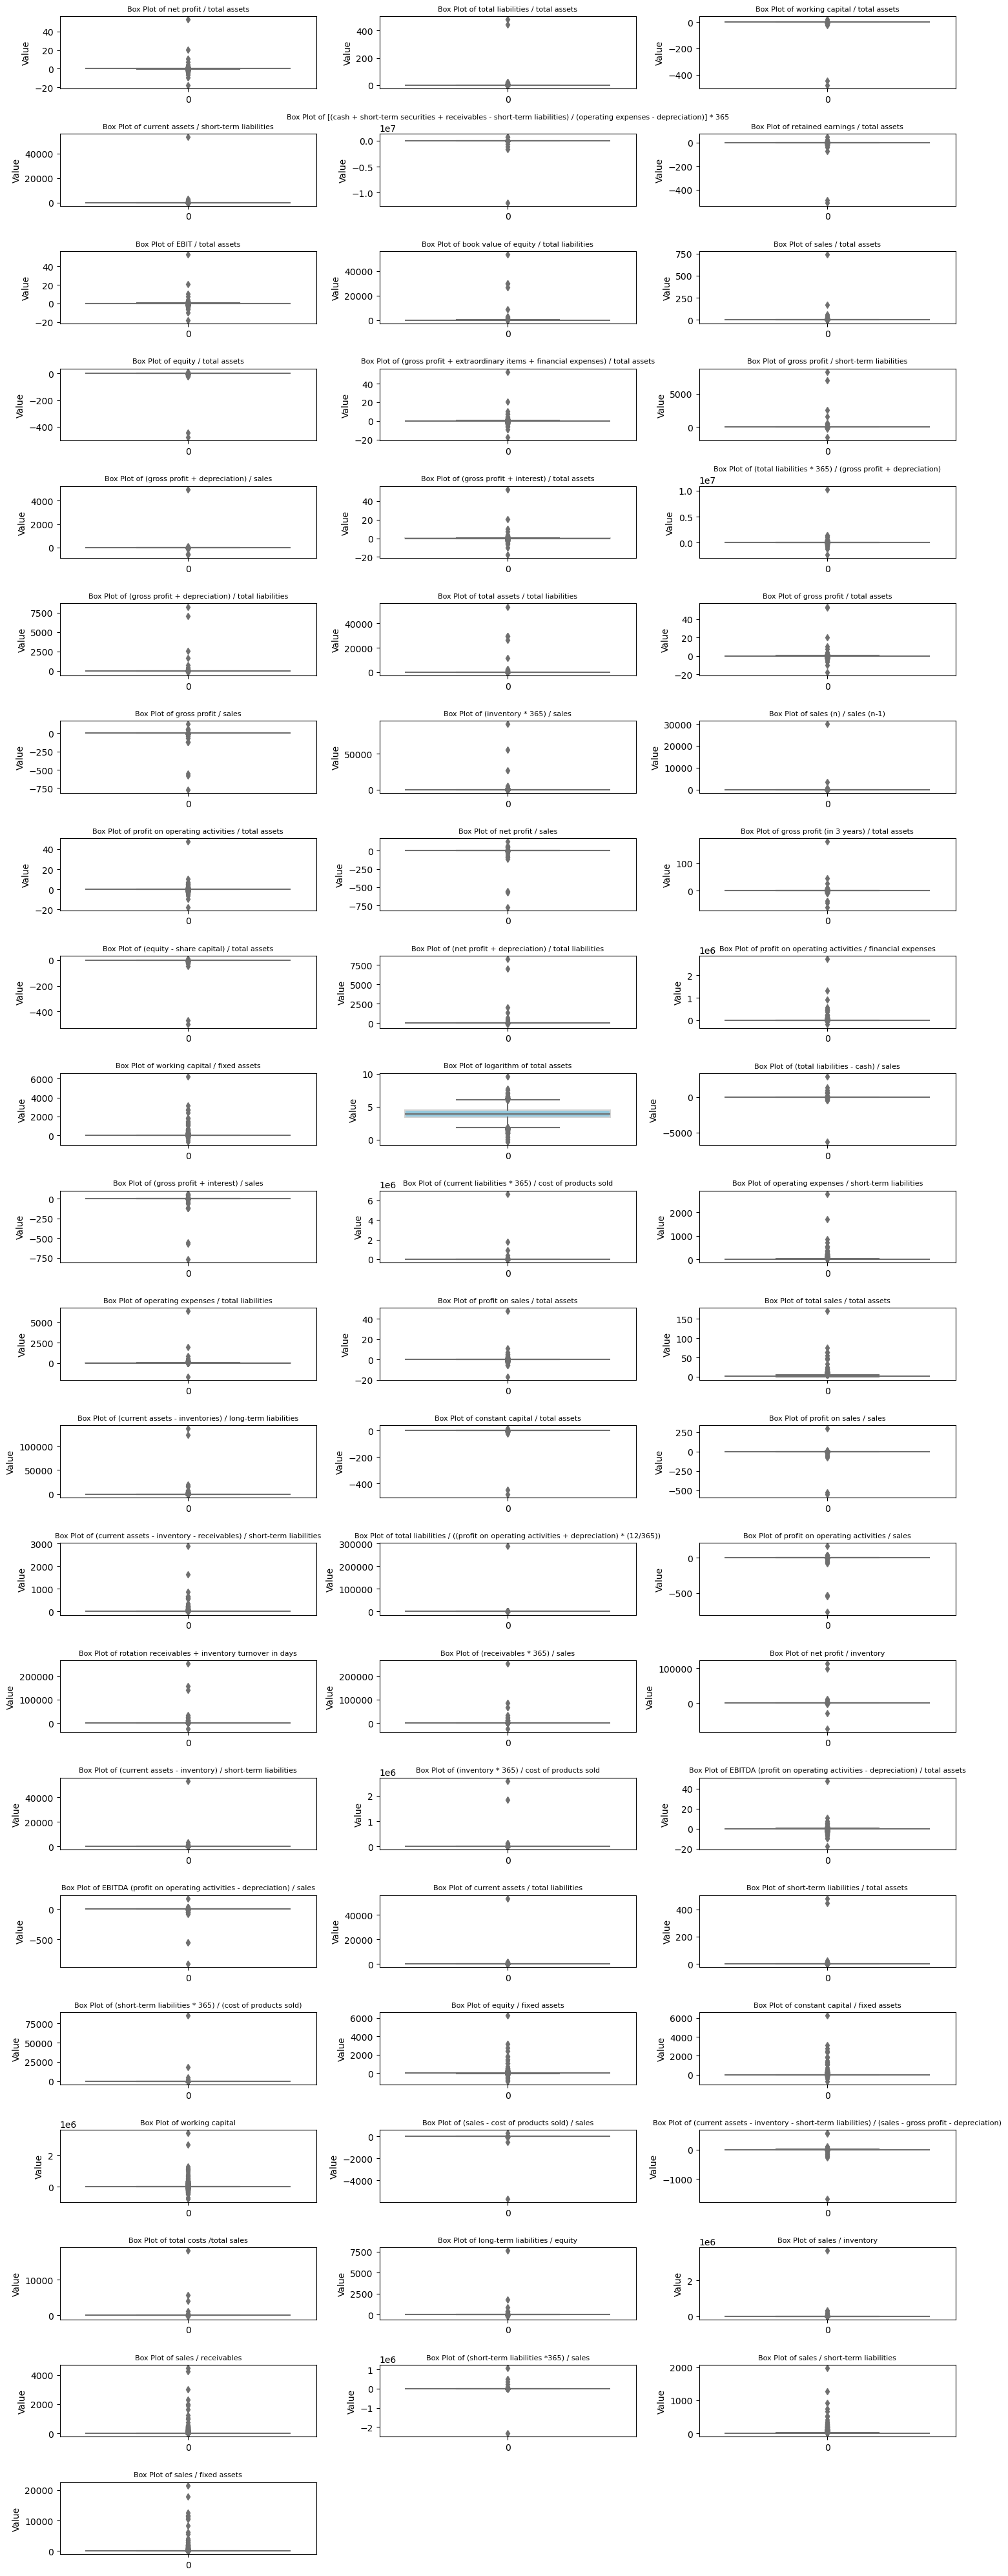

In [29]:
plt.figure(figsize=(15, 40))
i = 1

for column in df_graph.columns[:-1]:
    ax = plt.subplot(22, 3, i)  # Adjust layout as needed
    i += 1
    sns.boxplot(
        data=df_graph[column],
        color="skyblue",
        ax=ax,
        boxprops=dict(edgecolor="lightgrey"),
    )
    ax.set_title(f"Box Plot of {column}", fontsize=8)
    ax.set_ylabel("Value")

plt.tight_layout()
plt.show()

To see boxplot for individual explanatory variable. Change the index (0-64) at `explanatory_variable_index`. 
Hover over each outlier to see its value.

In [30]:
explanatory_variable_index = 10

df.iloc[:, explanatory_variable_index].iplot(
    kind="box",
    boxpoints="outliers",
    layout=dict(
        height=400,
        yaxis=dict(title="value"),
        title=f"Boxplot for {df.columns[explanatory_variable_index]}",
        margin=dict(b=140),
    ),
)

From the histogram and boxplots, we can see that we have many outliers for each explanatory variable in our dataset.

### Skewness of features

Interpreting Skewness:  
- Skewness < -1 or Skewness > 1: Highly skewed.
- -1 < Skewness < -0.5 or 0.5 < Skewness < 1: Moderately skewed.
- -0.5 < Skewness < 0.5: Approximately symmetric.

In [31]:
skewness = df.skew()
#print("Skewness of each feature:\n", skewness)

skewed_features = skewness[abs(skewness) > 0.5]
num_skewed_features = len(skewed_features)
print(f"Number of skewed features: {num_skewed_features}")
print(f"{num_skewed_features} out of {len(df.columns)} features are skewed.")

Number of skewed features: 64
64 out of 65 features are skewed.


From above, we see that almost all of the features are skewed.

### Test for normality

There are 4 statistical tests that we can use to test for normality in our data. These are:  
1. **Shapiro-Wilk Test**: Suitable for small to medium-sized datasets.
2. **Kolmogorov-Smirnov Test**: Suitable for larger datasets.
3. **Anderson-Darling Test**: An extension of the Kolmogorov-Smirnov test, often considered more powerful.
4. **Jarque-Bera Test**: Suitable for larger datasets, based on skewness and kurtosis.
 
Since our dataset has 10,501 samples and 62 out of 64 features are skewed, we will use Anderson-Darling test and the Kolmogorov-Smirnov test, as they are more suitable for larger sample sizes and can provide a better assessment of normality.

Using both tests could give us a comprehensive view of normality across the features.

#### Shapiro Wilk Test

In [32]:
from scipy.stats import shapiro, kstest, anderson, normaltest

shapiro_results = df.apply(lambda x: shapiro(x)[1])

# Check how many features are normally distributed
normal_features = shapiro_results[shapiro_results > 0.05]
non_normal_features = shapiro_results[shapiro_results <= 0.05]

print(f"Number of normally distributed features: {len(normal_features)}")
print(f"Number of non-normally distributed features: {len(non_normal_features)}")

Number of normally distributed features: 0
Number of non-normally distributed features: 21


#### Kolmogorov-Smirnov test

In [33]:
from scipy.stats import kstest

ks_results = df.apply(lambda x: kstest(x, 'norm')[1])

# Check how many features are normally distributed
normal_features = ks_results[ks_results > 0.05]
non_normal_features = ks_results[ks_results <= 0.05]

print(f"Number of normally distributed features: {len(normal_features)}")
print(f"Number of non-normally distributed features: {len(non_normal_features)}")


Number of normally distributed features: 0
Number of non-normally distributed features: 21


#### Anderson-Darling Test

In [35]:
significance_level = 5
normally_distributed_count = 0

for column in df.columns[:-1]:
    result = anderson(df[column], dist='norm')
    critical_value = result.critical_values[np.where(result.significance_level == significance_level)[0][0]]
    
    # Count the feature as normally distributed if the test statistic is less than the critical value
    if result.statistic < critical_value:
        normally_distributed_count += 1

print(f"Number of normally distributed features: {normally_distributed_count}")


Number of normally distributed features: 0


From the above 3 normality test, we can conclude that all features in the dataframe df is not normally distributed.

# Performed data imputation, removal of null values and normalisation

For more accurate visualisation and outlier detection later on.

In [36]:
from data_cleaning import get_Xy, med_impute, normalise, map_class_labels

# Performed data imputation, removal of null values and normalisation
def df_cleaning1(df):
    X, y = get_Xy(df)
    X_imputed, y = med_impute(X, y) #removed the columns with more than 40% null values
    X_scaled_df = normalise(X_imputed) 
    y_df = pd.DataFrame(y)
    y_df.rename(columns={0: "class"}, inplace=True)
    df_concat = pd.concat([X_scaled_df, y_df], axis=1)
    result_df = map_class_labels(df_concat)
    return result_df

df = df_cleaning1(df)
df.shape
df.head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
0,0.253983,0.000859,0.964690,0.000025,0.945548,0.918850,0.254627,0.000060,0.003252,0.976863,...,0.951045,0.751226,0.010893,0.022090,2.654090e-06,0.002875,0.685215,0.002193,0.000188,bankrupt
1,0.253586,0.000958,0.964969,0.000030,0.945550,0.917759,0.253950,0.000061,0.003799,0.977018,...,0.951023,0.751178,0.010897,0.022090,1.636031e-06,0.002390,0.685221,0.001809,0.000277,bankrupt
2,0.251515,0.000470,0.965383,0.000059,0.945557,0.918104,0.251572,0.000095,0.002998,0.977294,...,0.951019,0.751057,0.010902,0.022090,1.850773e-06,0.002319,0.685210,0.002851,0.000207,bankrupt
3,0.251856,0.000899,0.964955,0.000033,0.945549,0.918787,0.251856,0.000063,0.003056,0.977068,...,0.951026,0.751076,0.010899,0.022109,1.155292e-06,0.002601,0.685220,0.001871,0.000162,bankrupt
4,0.254184,0.000863,0.965090,0.000036,0.945545,0.917759,0.254827,0.000065,0.003445,0.977110,...,0.951047,0.751201,0.010893,0.022100,7.079395e-07,0.003052,0.685220,0.001839,0.000216,bankrupt


In [48]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro

# Filter for numeric columns only
numeric_df = df.select_dtypes(include=[np.number])

# Apply the Shapiro-Wilk test for normality on each numeric feature
shapiro_results = numeric_df.apply(lambda x: shapiro(x.dropna())[1] if x.dropna().shape[0] >= 3 else np.nan)

# Check how many features are normally distributed
normal_features = shapiro_results[shapiro_results > 0.05]
non_normal_features = shapiro_results[shapiro_results <= 0.05]

print(f"Number of normally distributed features: {len(normal_features)}")
print(f"Number of non-normally distributed features: {len(non_normal_features)}")


Number of normally distributed features: 0
Number of non-normally distributed features: 63


After some data transformation, all features in our dataframe is normally distributed.

In [49]:
from scipy.stats import kstest

ks_results = df.apply(lambda x: kstest(x, 'norm')[1])

# Check how many features are normally distributed
normal_features = ks_results[ks_results > 0.05]
non_normal_features = ks_results[ks_results <= 0.05]

print(f"Number of normally distributed features: {len(normal_features)}")
print(f"Number of non-normally distributed features: {len(non_normal_features)}")


Number of normally distributed features: 0
Number of non-normally distributed features: 0


## 3.8 Dealing with Outliers<a id="section2_2_2"></a>


There are several methods to deal with outliers:
1. Percentile Method - useful for identifying outliers in symmetrical and normal distributions
2. IQR Method 
3. Z-score Method 
4. Data transformation - ie log transformation to reduce skewness in data
5. Impute outliers

#### Method 1: **Percentile Method**   
Useful for identifying outliers in symmetrical and normal distributions. However, as seen in the histogram and density plots above, the dataset is not symmetrical nor normally distributed. Hence, we shall omit this method for dealing with outliers.


#### Method 2: **IQR Method**   

In [38]:
# TODO: remove this code chunk
# Remove outliers based on 1.5 * IQR for each feature
"""
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]


# Remove outliers for each feature and plot histograms
clean_list = []
for column in df_graph.columns:
    cleaned_data = remove_outliers(df_graph[column])
    clean_list.append(cleaned_data)
    """

'\ndef remove_outliers(column):\n    Q1 = column.quantile(0.25)\n    Q3 = column.quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    return column[(column >= lower_bound) & (column <= upper_bound)]\n\n\n# Remove outliers for each feature and plot histograms\nclean_list = []\nfor column in df_graph.columns:\n    cleaned_data = remove_outliers(df_graph[column])\n    clean_list.append(cleaned_data)\n    '

In [39]:
import numpy as np

def remove_outliers(df, column, iqr_factor=1.5):
    if df[column].empty:
        return df
    
    column_values = df[column].values
    Q1 = np.percentile(column_values, 0.25)
    Q3 = np.percentile(column_values, 0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR

    df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]

    return df

df_cleaned = df.copy()
for column in df.columns:
    df_cleaned = remove_outliers(df_cleaned, column)

df_cleaned.shape

(0, 64)

Using 1.5 times IQR method to remove outliers causes all rows to be removed in the dataset because the values in each column is very skewed.

#### Method 3: **Z-score Method**   
We shall also omit this method for dealing with outliers since our data for each feature is neither symmetrical nor normally distributed.

#### Method 4: **Data transformation**   


In [40]:
#TODO

#### Method 5: **Impute outliers**
Since our data is highly skewed, it is not reliable to use the mean or median for outlier imputation. Thus, we shall omit this method for dealing with outliers. 

## Visualisations after dealing with outliers
- Histogram
- Density plots
- Boxplots

#### Histogram (After Outlier Removal)

<Figure size 1500x4000 with 0 Axes>

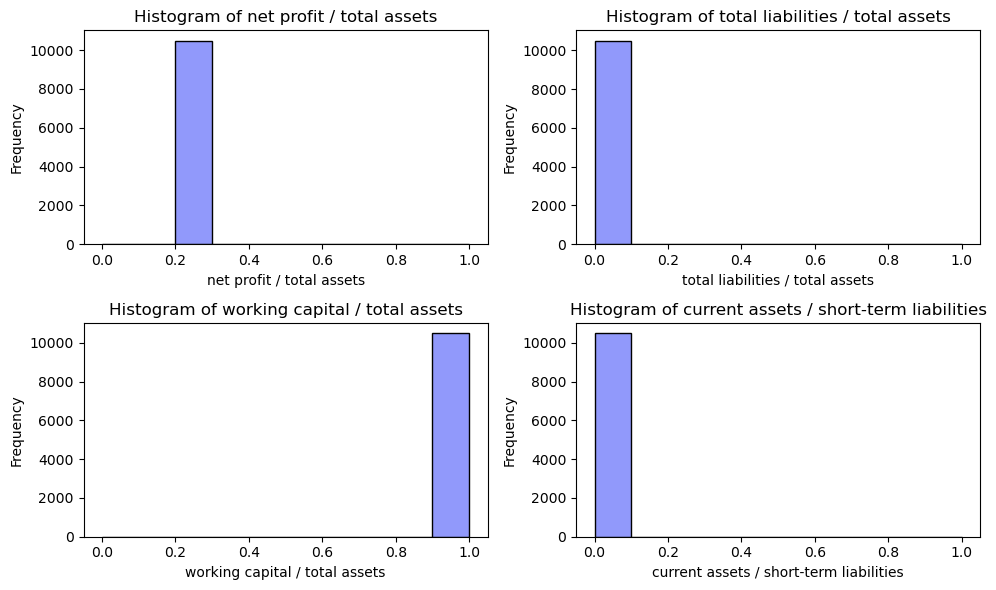

In [42]:
plt.figure(figsize=(15, 40))

df_graph = df.copy()
features = df_graph.columns[:4]
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(df_graph[feature], bins=10, ax=axes[i], color="#636efa", alpha=0.7)
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Histogram of {feature}")
    axes[i].grid(False)

plt.tight_layout()
plt.show()

##### Density plot (After Outlier Removal)

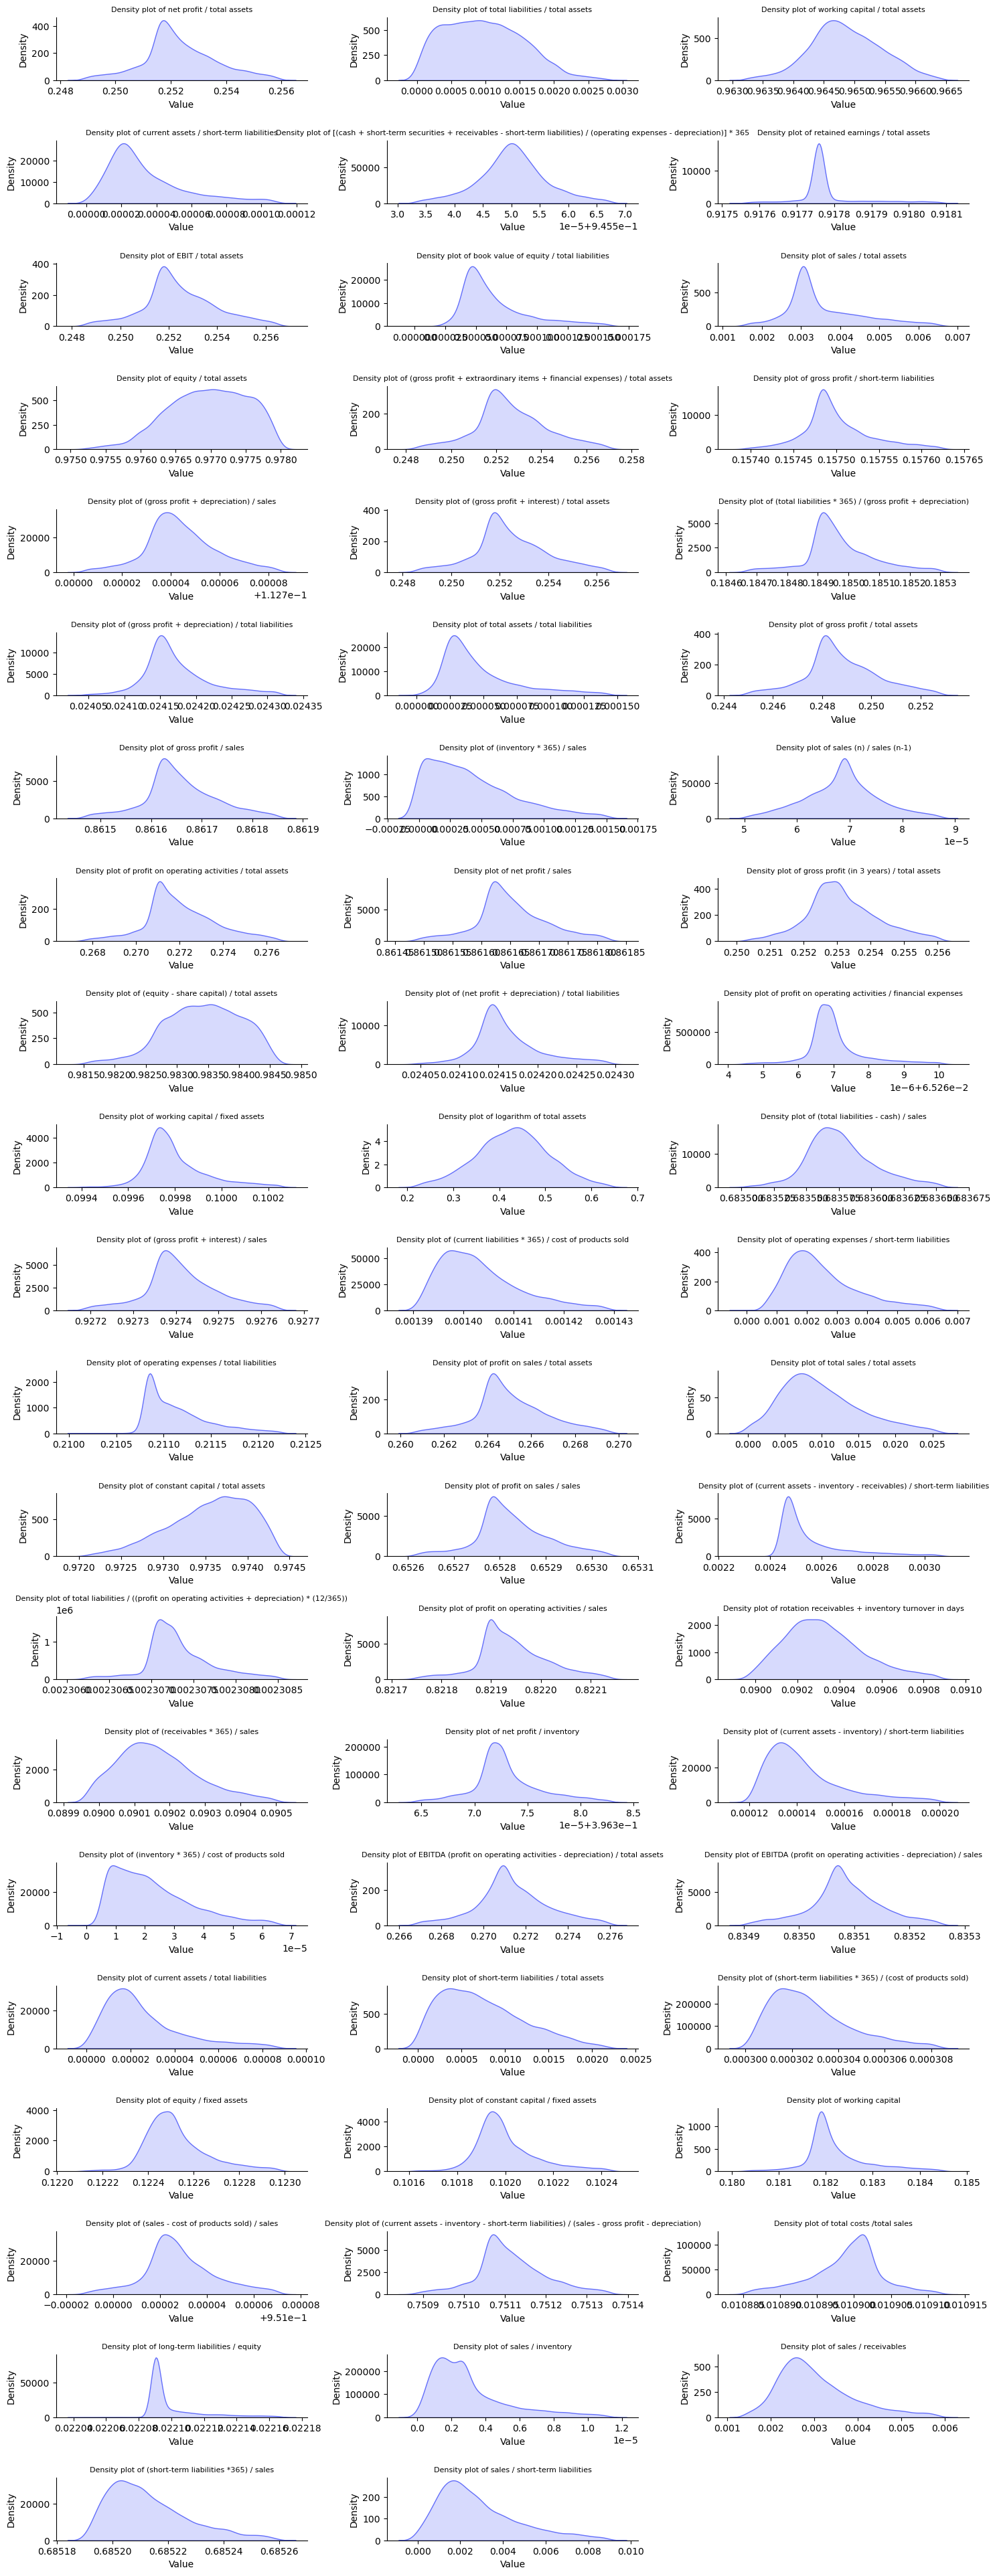

In [ ]:
plt.figure(figsize=(15, 40))

for i, series in enumerate(clean_list[: len(clean_list) - 1], start=1):
    plt.subplot(22, 3, i)  # Adjust layout as needed
    sns.kdeplot(series, color="#636efa", fill=True)
    plt.title(f"Density plot of {series.name}", fontsize=8)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.tick_params(axis="both", which="major", labelsize=10)
    plt.tick_params(axis="both", which="minor", labelsize=8)
    plt.grid(False)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

##### Boxplots (After outlier removal)

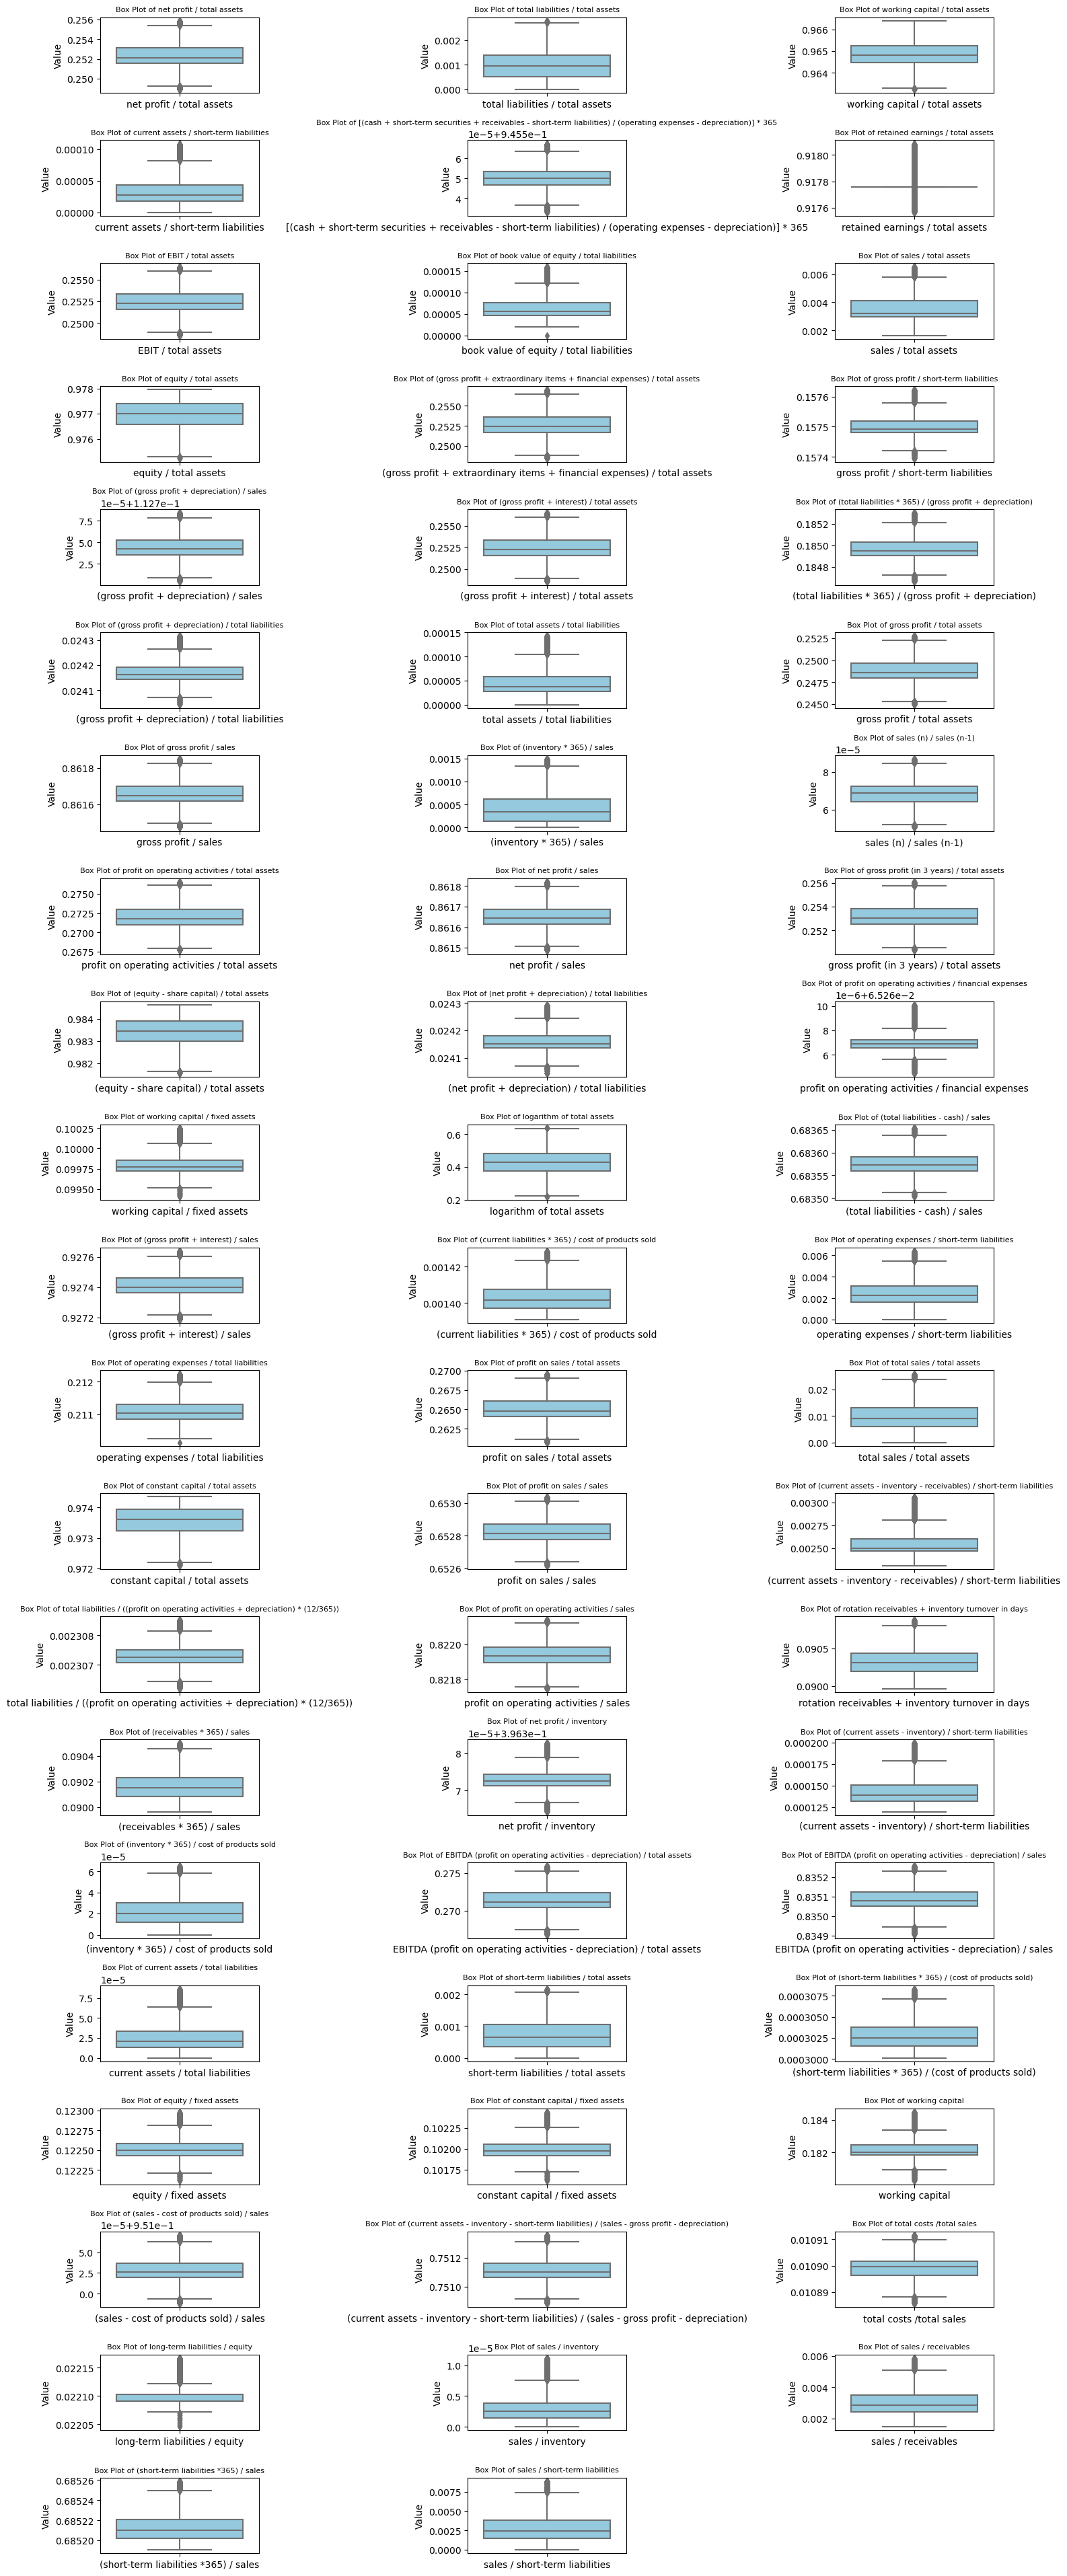

In [ ]:
plt.figure(figsize=(15, 40))

for i, series in enumerate(clean_list[: len(clean_list) - 1], start=1):
    plt.subplot(22, 3, i)  # Adjust layout as needed
    sns.boxplot(data=pd.DataFrame(series), color="skyblue")
    plt.title(f"Box Plot of {series.name}", fontsize=8)
    plt.ylabel("Value")

plt.tight_layout()
plt.show()

After removing the outliers, it becomes apparent that the majority of features exhibit smoother distributions. Nonetheless, due to the substantial presence of outliers, we have opted against their removal in subsequent data processing steps to prevent information loss.




## 4) Data Pre-Processing <a class="anchor" id="section2_3"></a>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
#TODO 
#preprocess everything from start to finish

The function below splits the feature space and the target column.

In [ ]:
# function to separate features and target
def get_Xy(df):
    X = df.iloc[:, 0 : len(df.columns) - 1]
    y = df.iloc[:, -1]
    return X, y

From EDA, it is observed that there are many missing values in the dataset. We removed the column with more than 40% values missing as it is a significant loss of information. Rows with more than half of the values missing are also removed. For the remaining missing values, median imputation is used in view of the presence of drastic outliers in the dataset. 

In [ ]:
# function to handle missing values
def med_impute(df, y):
    # remove columns with more than 40% values being null
    thd1 = df.shape[0] * 0.4
    cols = df.columns[df.isnull().sum() < thd1]
    df = df[cols]

    # remove rows with more than 50% values being null
    thd2 = df.shape[1] * 0.5
    y = y[df.isnull().sum(axis=1) <= thd2]
    df = df[df.isnull().sum(axis=1) <= thd2]

    # median imputation for null values
    df = df.fillna(df.median())

    return df, y

The function is to normalise numerical columns to remove effect of inconsistent scales between feature columns.

In [ ]:
def normalise(df):
    scaler = MinMaxScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return X_scaled

The function is to drop columns that are of strong correlation with one or more other feature column(s) to remove the adverse effect of multicollinearity on subsequent classification result. 

In [ ]:
# function for feature selection
def drop_high_corr(df, threshold=0.7):
    correlation_matrix = df.corr()
    high_cor = []
    dropped_features = []

    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                if correlation_matrix.columns[j] != correlation_matrix.columns[i]:
                    high_cor.append(
                        [
                            correlation_matrix.columns[i],
                            correlation_matrix.columns[j],
                            correlation_matrix.iloc[i, j],
                        ]
                    )

    for pair in high_cor:
        feature1, feature2, correlation = pair
        if feature1 not in dropped_features and feature2 not in dropped_features:
            if feature2 in df.columns:
                df.drop(feature2, axis=1, inplace=True)
                dropped_features.append(feature2)
            else:
                print("Feature '" + feature2 + "' not found in the DataFrame.")
    return df

In [ ]:
# TODO: Have different pipelines. Use airflow?


def process0(df):
    X, y = get_Xy(df)
    X_imputed, y = med_impute(X, y)
    X_scaled_df = normalise(X_imputed)
    return X_scaled_df, y


# function to pre-process the data
def process1(df):
    X, y = get_Xy(df)
    X_imputed, y = med_impute(X, y)
    X_scaled_df = normalise(X_imputed)
    return drop_high_corr(X_scaled_df), y


# function to obtain train and test sets
def process2(df):
    X, y = process1(df)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=3244
    )

    return X_train, X_test, y_train, y_test


# function to obtain train and test sets with sythesised instances of the minority class
def pre_process(df):
    X, y = process1(df)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=3244
    )
    smote = SMOTE(random_state=3244)
    X_smote, y_train = smote.fit_resample(X_train, y_train)

    return X_smote, X_test, y_train, y_test